In [1]:
#Creating a graph in pytorch

import torch

def compute_z(a, b, c):
    #(a + b)*2 + c = z
    
    r1 = torch.sub(a, b)
    r2 = torch.mul(r1, 2)
    z = torch.add(r2, c)
    
    return z

In [2]:
#using glorot initialization to produce random number tensors

import torch.nn as nn
torch.manual_seed(1)

w = torch.empty(2,3) #Empty torch. 2 rows, 3 columns

nn.init.xavier_normal_(w)

tensor([[ 0.4183,  0.1688,  0.0390],
        [ 0.3930, -0.2858, -0.1051]])

In [3]:
#Computing gradients via automatic differentiation

w = torch.tensor(1.0, requires_grad = True)
b = torch.tensor(0.5, requires_grad = True)

x = torch.tensor([1.4])
y = torch.tensor([2.1])
z = torch.add(torch.mul(w, x), b)

loss = (y-z).pow(2).sum() #Loss function. MSE

loss.backward()

print('dl/dw:, ', w.grad)
print('dl/db:, ', b.grad)


dl/dw:,  tensor(-0.5600)
dl/db:,  tensor(-0.4000)


In [4]:
#Simplifying common architectures via torch.nn module

#nn.sequential -> layers connected in a cascading way

model = nn.Sequential(
    nn.Linear(4, 16),
    nn.ReLU(),
    nn.Linear(16, 32),
    nn.ReLU(),
)
model

Sequential(
  (0): Linear(in_features=4, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=32, bias=True)
  (3): ReLU()
)

In [5]:
# Initiallizing random weights for first layer
# Configure second layer by computing L1 penalty term

nn.init.xavier_uniform_(model[0].weight)

l1_weight = 0.01
l1_penalty = l1_weight*model[2].weight.abs().sum()

In [6]:
#Loss function is Cross-Entropy for binary classification
#Optimizer is SGD optimizer

loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)

In [7]:
# XOR classification problem

# Toy dataset: x1 and x2 from uniform distribution [-1, 1)
# y = 0 if x1*x2 < 0. else y = 1

# 100 for training. 50 for validation. 50 for testing

In [8]:
import matplotlib.pyplot as plt
import numpy as np
torch.manual_seed(1)
np.random.seed(1)

x = np.random.uniform(low = -1, high = 1, size = (200, 2))
y = np.ones(len(x))

y[x[: ,0] * x[: , 1] < 0] = 0
n_train = 100

x_train = torch.tensor(x[:n_train, :], dtype = torch.float32)
y_train = torch.tensor(y[:n_train], dtype = torch.float32)

x_valid = torch.tensor(x[n_train: , :], dtype = torch.float32)
y_valid = torch.tensor(y[n_train:], dtype = torch.float32)

In [9]:
from torch.utils.data import DataLoader, TensorDataset
 
    
train_ds = TensorDataset(x_train, y_train)
batch_size = 2
torch.manual_seed(1)
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [10]:
#Model Capacity -> how readily the model can handle complex function


model = nn.Sequential(
    nn.Linear(2, 1),
    nn.Sigmoid()
)

model

loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)


In [11]:
torch.manual_seed(1)
num_epochs = 200
def train(model, num_epochs, train_dl, x_valid, y_valid):
    loss_hist_train = [0] * num_epochs
    accuracy_hist_train = [0] * num_epochs
    loss_hist_valid = [0] * num_epochs
    accuracy_hist_valid = [0] * num_epochs
    for epoch in range(num_epochs):
        for x_batch, y_batch in train_dl:
            pred = model(x_batch)[:, 0]
            loss = loss_fn(pred, y_batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            loss_hist_train[epoch] += loss.item()
            is_correct = ((pred>=0.5).float() == y_batch).float()
            accuracy_hist_train[epoch] += is_correct.mean()

        loss_hist_train[epoch] /= n_train/batch_size
        accuracy_hist_train[epoch] /= n_train/batch_size

        pred = model(x_valid)[:, 0]
        loss = loss_fn(pred, y_valid)
        loss_hist_valid[epoch] = loss.item()
        is_correct = ((pred>=0.5).float() == y_valid).float()
        accuracy_hist_valid[epoch] += is_correct.mean()
    return loss_hist_train, loss_hist_valid, accuracy_hist_train, accuracy_hist_valid

history = train(model, num_epochs, train_dl, x_valid, y_valid)



In [12]:
newModel = nn.Sequential(
    nn.Linear(2, 4),
    nn.ReLU(),
    nn.Linear(4, 4),
    nn.ReLU(),
    nn.Linear(4, 1),
    nn.Sigmoid()
)

loss_fn = nn.BCELoss()

In [13]:
param = newModel.parameters()


optimizer = torch.optim.SGD(param, lr = 0.015)

In [14]:
history1 = train(newModel, num_epochs, train_dl, x_valid, y_valid)

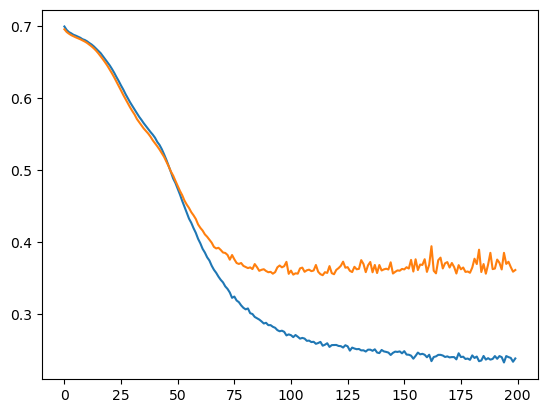

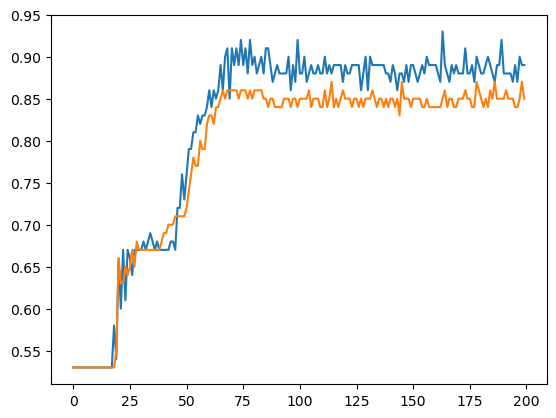

In [15]:
plt.plot(history1[0])
plt.plot(history1[1])
plt.show()

plt.plot(history1[2])
plt.plot(history1[3])
plt.show()

In [16]:
class MyModule(nn.Module):
    def __init__(self):
        super().__init__()
        l1 = nn.Linear(2, 4)
        a1 = nn.ReLU()
        l2 = nn.Linear(4,4)
        a2 = nn.ReLU()
        l3 = nn.Linear(4, 1)
        a3 = nn.Sigmoid()
    
        l = [l1, a1, l2, a2, l3, a3]
    
        self.module_list = nn.ModuleList(l)
    
    def forward(self, x):
        for f in self.module_list:
            x = f(x)
        
        return x

In [17]:
model = MyModule()

loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.015)

history = train(model, num_epochs, train_dl, x_valid, y_valid)

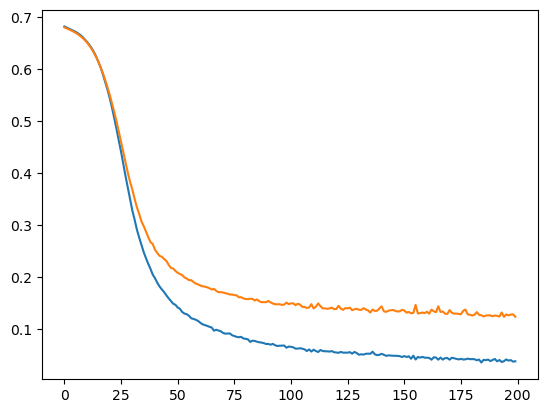

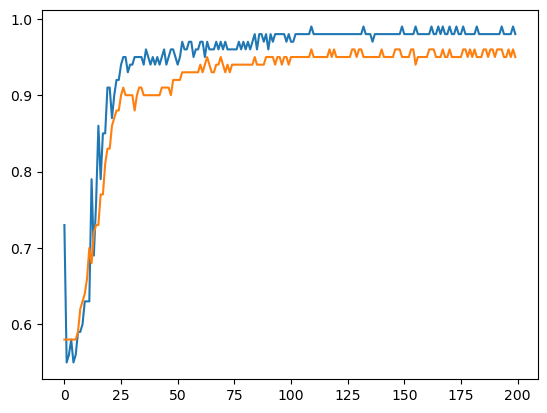

In [18]:
plt.plot(history[0])
plt.plot(history[1])
plt.show()

plt.plot(history[2])
plt.plot(history[3])
plt.show()

In [19]:
def predict(self, x):
    x = torch.tensor(x, dtype = torch.float32)
    pred = self.forward(x)[:, 0]
    return (pred >= 0.5).float()

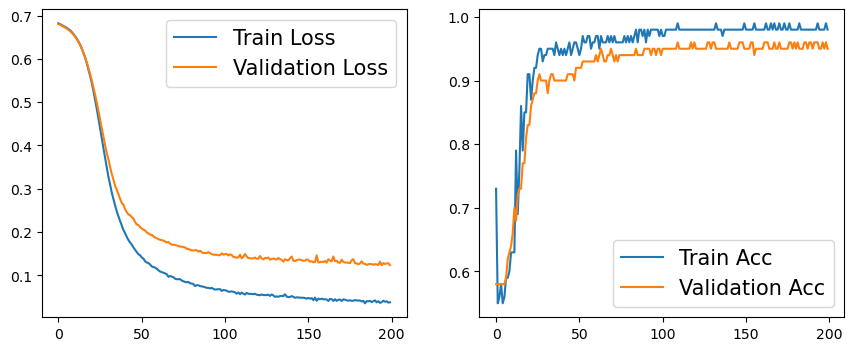

In [20]:
from mlxtend.plotting import plot_decision_regions

fig = plt.figure(figsize = (16, 4))
ax = fig.add_subplot(1, 3, 1)
plt.plot(history[0])
plt.plot(history[1])
plt.legend(['Train Loss', 'Validation Loss'], fontsize = 15)

ax = fig.add_subplot(1, 3, 2)
plt.plot(history[2])
plt.plot(history[3])
plt.legend(['Train Acc', 'Validation Acc'], fontsize = 15)

In [27]:
# Custom Layer in Pytorch.
# Layers not supported by pytorch
# Example of custom layer that would be implemented -> w(x + e) + b.
# w -> weight. b is bias. x is the input variable. E is noise


#Matmul -> matrix product of 2 tensors
class NoisyLinear(nn.Module):
    def __init__(self, input_size, output_size, noise_stdev = 0.1):
        
        super().__init__()
        
        # w is tensor matrix. Number of rows is the same as input size. 
        w = torch.Tensor(input_size, output_size)
        
        self.w = nn.Parameter(w) #This a tensor. A module parameter
        
        nn.init.xavier_uniform_(self.w)
        
        #Creating b. A vector same size as 
        b = torch.Tensor(output_size).fill_(0)
        #Initializing b
        self.b = nn.Parameter(b)
        
        #Initializing noise/standard deviatiom
        self.noise_stdev = noise_stdev
    
    def forward(self, x, training = False):
        if training:
            noise = torch.normal(0.0, self.noise_stdev, x.shape)
            x_new = torch.add(x, noise)
            
        else:
            x_new = x
        
        return torch.add(torch.mm(x_new, self.w), self.b)
          
        

In [28]:
#Custom function example

torch.manual_seed(1)
noise_layer = NoisyLinear(4, 2)

x = torch.zeros((1, 4))
print(noise_layer(x, training = True))

tensor([[ 0.1154, -0.0598]], grad_fn=<AddBackward0>)


In [32]:
class MyNoisyModule(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = NoisyLinear(2, 4, 0.07)
        self.a1 = nn.ReLU()
        self.l2 = nn.Linear(4, 4)
        self.a2 = nn.ReLU()
        self.l3 = nn.Linear(4, 1)
        self.a3 = nn.Sigmoid()
        
    def forward(self, x, training = False):
        x = self.l1(x, training)
        x = self.a1(x)
        x = self.l2(x)
        x = self.a2(x)
        x = self.l3(x)
        x = self.a3(x)
        
        return x
    
    def predict(self, x):
        x = torch.Tensor(x, dtype = torch.float32)
        pred = self.forward(x)[:, 0]
        return (pred >= 0.5).float()
    
torch.manual_seed(1)

model = MyNoisyModule()

loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)

history = train(model, num_epochs, train_dl, x_valid, y_valid)

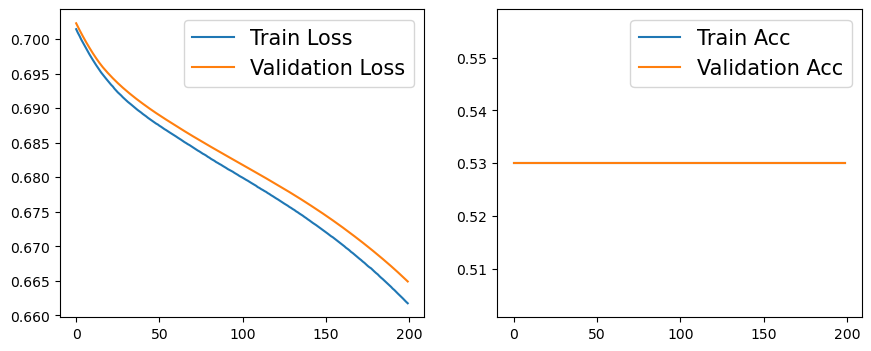

In [33]:
fig = plt.figure(figsize = (16, 4))
ax = fig.add_subplot(1, 3, 1)
plt.plot(history[0])
plt.plot(history[1])
plt.legend(['Train Loss', 'Validation Loss'], fontsize = 15)

ax = fig.add_subplot(1, 3, 2)
plt.plot(history[2])
plt.plot(history[3])
plt.legend(['Train Acc', 'Validation Acc'], fontsize = 15)

In [ ]:
#Project: Predicting the fuel effecieny of the car

In [70]:
import pandas as pd
url = 'http://archive.ics.uci.edu/ml/' \
      'machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower',
                'Weight', 'Acceleration', 'Model Year', 'Origin']
df = pd.read_csv(url, names=column_names,
                 na_values = "?", comment='\t',
                 sep=" ", skipinitialspace=True)

df = df.dropna()
df = df.reset_index(drop=True)

In [71]:
import sklearn
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, train_size = 0.8, random_state = 1)

train_stats = df_train.describe()
train_stats

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000
mean,23.404153,5.402556,189.512780,102.929712,2961.198083,15.704473,75.929712,1.591054
std,7.666909,1.701506,102.675646,37.919046,848.602146,2.725399,3.675305,0.807923
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.500000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,75.000000,2219.000000,14.000000,73.000000,1.000000
50%,23.000000,4.000000,140.000000,92.000000,2755.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,260.000000,120.000000,3574.000000,17.300000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [72]:
numericColumns = ['Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration']

df_trainNorm, df_testNorm = df_train.copy(), df_test.copy()

#Normalizing the numeric columns in the 2 dataframes
for col in numericColumns:
    df_trainNorm[col] = (df_trainNorm[col] - df_trainNorm[col].mean())/df_trainNorm[col].std()
    
    df_testNorm[col] = (df_testNorm[col] - df_trainNorm[col].mean())/df_trainNorm[col].std()

In [73]:
len(df['Model Year'].unique())

13

In [74]:
#Bucketizing the model year

boundaries = torch.Tensor([73, 76, 79])

v = torch.tensor(df_trainNorm['Model Year'].values)

df_trainNorm['Model Year Bucketed'] = torch.bucketize(v, boundaries, right = True)

b = torch.tensor(df_testNorm['Model Year'].values)

df_testNorm['Model Year Bucketed'] = torch.bucketize(b, boundaries, right = True)

numericColumns.append('Model Year Bucketed')

In [75]:
df_testNorm.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Model Year Bucketed
23,26.0,4.0,121.0,113.0,2234.0,12.5,70,2,0
293,35.7,4.0,98.0,80.0,1915.0,14.4,79,1,3
13,14.0,8.0,455.0,225.0,3086.0,10.0,70,1,0
90,13.0,8.0,400.0,150.0,4464.0,12.0,73,1,1
61,13.0,8.0,350.0,165.0,4274.0,12.0,72,1,0


In [76]:
#One Hot encoding of origin

from torch.nn.functional import one_hot

totalOrigin = len(set(df_trainNorm['Origin']))

origin_encoded = one_hot(torch.from_numpy(
    df_trainNorm['Origin'].values) % totalOrigin)

x_trainNumeric = torch.tensor(df_trainNorm[numericColumns].values)

X_train = torch.cat([x_trainNumeric, origin_encoded], 1).float() #1 here is the dimension. Concat the columns
 
origin_encoded = one_hot(torch.from_numpy(df_testNorm['Origin'].values) % totalOrigin)

x_test_numeric = torch.tensor(df_testNorm[numericColumns].values)

x_test = torch.cat([x_test_numeric, origin_encoded], 1).float()

In [79]:
X_test = x_test

In [81]:
X_test.shape

torch.Size([79, 9])

In [84]:
y_train = torch.tensor(df_trainNorm['MPG'].values).float()
y_test = torch.tensor(df_testNorm['MPG'].values).float()

In [86]:
#Training the model

train_ds = TensorDataset(X_train, y_train)

In [87]:
torch.manual_seed(1)
train_dl = DataLoader(train_ds, batch_size = 8, shuffle=True)


In [88]:
X_train.shape

torch.Size([313, 9])

In [105]:
modelMPG = nn.Sequential(
    nn.Linear(9, 8, bias = True),
    nn.ReLU(),
    nn.Linear(8, 4, bias = True),
    nn.ReLU(),
    nn.Linear(4, 1, bias = True)
    
)

modelMPG

Sequential(
  (0): Linear(in_features=9, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=4, bias=True)
  (3): ReLU()
  (4): Linear(in_features=4, out_features=1, bias=True)
)

In [106]:
lossMPG_func = nn.MSELoss()
optimizer = torch.optim.SGD(modelMPG.parameters(), lr = 0.001)

for epoch in range(200):
    loss_hist_train = 0
    for x_batch, y_batch in train_dl:
        pred = modelMPG(x_batch)[:, 0]
        loss = lossMPG_func(pred, y_batch)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        
        loss_hist_train += loss.item()
    
    if epoch%10 == 0:
        print(epoch, (loss.item()/8))

0 0.8357657194137573
10 8.30449104309082
20 0.06977494060993195
30 0.0027680308558046818
40 0.5946698784828186
50 3.1781387329101562
60 0.04955710843205452
70 0.26230621337890625
80 0.07946820557117462
90 0.6673415899276733
100 1.936597228050232
110 0.0826202929019928
120 0.3904463052749634
130 0.25066351890563965
140 0.013575068674981594
150 0.01311608124524355
160 0.05456427484750748
170 0.6203066110610962
180 2.230109930038452
190 1.3478114604949951


In [107]:
loss_hist_train

251.21891403198242

In [101]:
y_test

tensor([23.0000, 29.0000, 32.4000, 19.0000, 38.0000, 33.5000, 26.0000, 14.0000,
        28.0000, 32.4000, 21.5000, 41.5000, 17.0000, 33.5000, 29.0000, 17.0000,
        36.0000, 43.4000, 14.0000, 20.0000, 26.0000, 16.0000, 15.0000, 15.5000,
        15.0000, 18.5000, 31.5000, 20.0000, 21.0000, 30.0000, 19.2000, 24.5000,
        13.0000, 22.0000, 20.5000, 17.5000, 18.0000, 19.2000, 38.0000, 27.0000,
        15.5000, 14.0000, 20.0000, 19.0000, 18.0000, 15.0000, 11.0000, 31.0000,
        22.0000, 13.0000, 17.0000, 20.5000, 28.0000, 32.0000, 29.8000, 18.0000,
        28.8000, 21.0000, 33.5000, 36.1000, 38.0000, 28.0000, 37.0000, 19.9000,
        22.5000, 19.0000, 19.0000, 14.0000, 31.9000, 12.0000, 37.0000, 19.2000,
        13.0000, 34.3000, 26.0000, 35.7000, 14.0000, 13.0000, 13.0000])

In [108]:

with torch.no_grad():
    pred = modelMPG(X_test.float())[:, 0]
    loss = lossMPG_func(pred, y_test)
    print('MSE: ', loss.item())
    print('MAE: ', nn.L1Loss()(pred, y_test).item())

MSE:  14932661.0
MAE:  3723.638916015625
